In [1]:
%load_ext autoreload
%autoreload 2

import math
import torch
import matplotlib.pyplot as plt

torch.manual_seed(0)

from utils.algorithms import alg_11

def get_mecs(data, labels, classes):
    sizes = [0, 0.25, 0.5, 1, 2, 5, 10, 20, 40, 80, 100]
    mecs = torch.Tensor(alg_11(data.flatten(start_dim=1), labels, sizes))*math.log2(classes)

    return mecs, sizes


Images shape:  torch.Size([15000, 1, 64, 64]) Images dtype:  torch.uint8 Labels shape:  torch.Size([15000]) Labels dtype:  torch.int64
Data shape:  torch.Size([10000, 1, 64, 64])
Mean:  tensor([2.1953]) Std:  tensor([13.8768])
100% MEC for Chinese MNIST:  tensor(51.1494)
Files already downloaded and verified
Files already downloaded and verified


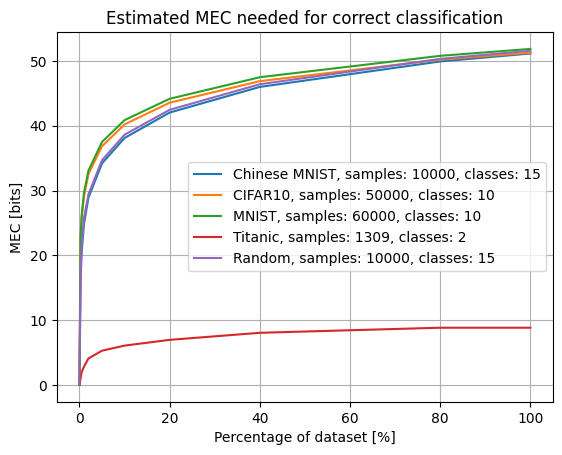

In [3]:
from utils.chinese_mnist_loader import load_chinese_mnist
from utils.utils import prepare_data_loaders, unpack_dataset
from utils.utils import load_cifar10, load_mnist, load_titanic

# Chinese MNIST prepare
data, labels = load_chinese_mnist()
data_loaders, data_sets, transform = prepare_data_loaders(data, labels, train_perc=2/3, test_perc=1/6, batch_size=50, num_workers=4)
data, labels = unpack_dataset(data_sets['train_data'])
mecs, sizes = get_mecs(data, labels, classes=15)

print("100% MEC for Chinese MNIST: ", mecs[-1])

# All of CIFAR preapare
cifar_train_data, _ = load_cifar10()
data_cifar, labels_cifar = unpack_dataset(cifar_train_data)
cifar_mecs, _ = get_mecs(data_cifar, labels_cifar, classes=10)

# All of MNIST prepare
mnist_train_data, _ = load_mnist()
data_mnist, labels_mnist = unpack_dataset(mnist_train_data)
mnist_mecs, _ = get_mecs(data_mnist, labels_mnist, classes=10)

# All of titanic
data_titanic, labels_titanic = load_titanic()
titanic_mecs, _ = get_mecs(data_titanic, labels_titanic, classes=2)

# Random prepare
data_rand = torch.rand_like(data)
labels_rand = torch.randint(0, 15, labels.shape)
mecs_rand, _ = get_mecs(data_rand, labels_rand, classes=15)

#plt.plot(sizes, 100*mecs / data.shape[0])
#plt.plot(sizes, 100*mecs_rand / data.shape[0])
plt.plot(sizes, mecs)
plt.plot(sizes, cifar_mecs)
plt.plot(sizes, mnist_mecs)
plt.plot(sizes, titanic_mecs)
plt.plot(sizes, mecs_rand)
plt.legend([f'Chinese MNIST, samples: {data.shape[0]}, classes: 15', 
            f'CIFAR10, samples: {data_cifar.shape[0]}, classes: 10',
            f'MNIST, samples: {data_mnist.shape[0]}, classes: 10',
            f'Titanic, samples: {data_titanic.shape[0]}, classes: 2',
            f'Random, samples: {data_rand.shape[0]}, classes: 15'])
#plt.plot(sizes, sizes)
plt.title('Estimated MEC needed for correct classification')
plt.xlabel('Percentage of dataset [%]')
plt.ylabel('MEC [bits]')
#plt.ylim(bottom=0, top=1)
plt.grid()
plt.savefig('figures/mec_needed.pdf', format='pdf')
plt.show()

